In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[ : ,1:-1].values
Y=dataset.iloc[ : ,-1].values
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [3]:
#transformation of Y-into vertically(because of standard Scalar wants 2D->array and a unique formate)
Y=Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X=sc_X.fit_transform(X)
Y=sc_Y.fit_transform(Y)

In [7]:
#traning the SVR model on the whole dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')#radical based fuinction
regressor.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
#predicting a new result
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

AttributeError: ignored

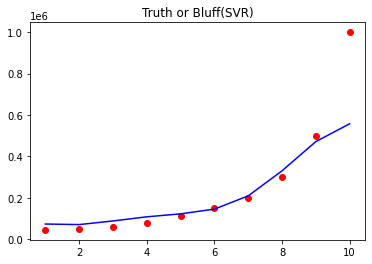

In [10]:
#Visiualising the SVR result
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.Xlabel('Position level')
plt.Ylabel('Salary')
plt.show()

AttributeError: ignored

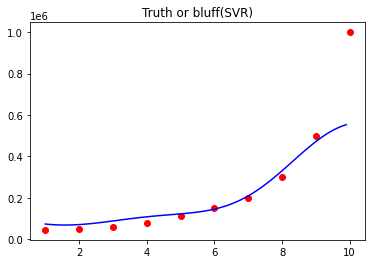

In [11]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='red')
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))),color='blue')
plt.title('Truth or bluff(SVR)')
plt.Xlabel('Position')
plt.Ylabel('salary')
plt.show()